In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re

def remove_math_expressions(text):
    # Remove LaTeX math expressions: $...$, $$...$$, \(...\), \[...\]
    text = re.sub(r'\$\$.*?\$\$', '', text, flags=re.DOTALL)
    text = re.sub(r'\$.*?\$', '', text, flags=re.DOTALL)
    text = re.sub(r'\\\[(.*?)\\\]', '', text, flags=re.DOTALL)
    text = re.sub(r'\\\((.*?)\\\)', '', text, flags=re.DOTALL)
    # Remove LaTeX environment blocks
    text = re.sub(r'\\begin\{.*?\}.*?\\end\{.*?\}', '', text, flags=re.DOTALL)
    # Remove HTML <math> tags
    text = re.sub(r'<math.*?>.*?</math>', '', text, flags=re.DOTALL)
    return text

In [8]:
csv_folder = r"C:\Users\jiali\OneDrive - TUM\Studium\Data-Mining\physics.stackexchange.com\CSV"
csv_path = os.path.join(csv_folder, "Posts.csv")
df = pd.read_csv(csv_path)

In [9]:
df['AcceptedAnswerId'] = df['AcceptedAnswerId'].fillna(0)
df['ViewCount'] = df['ViewCount'].fillna(0)
df['AnswerCount'] = df['AnswerCount'].fillna(0)
df.dropna(subset=['Body'], inplace=True)
df['CreationDate'] = pd.to_datetime(df['CreationDate'])
df['LastEditDate'] = pd.to_datetime(df['LastEditDate'])
df['LastActivityDate'] = pd.to_datetime(df['LastActivityDate'])

count    93163.000000
mean         5.968024
std         56.698106
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       6703.000000
Name: count, dtype: float64


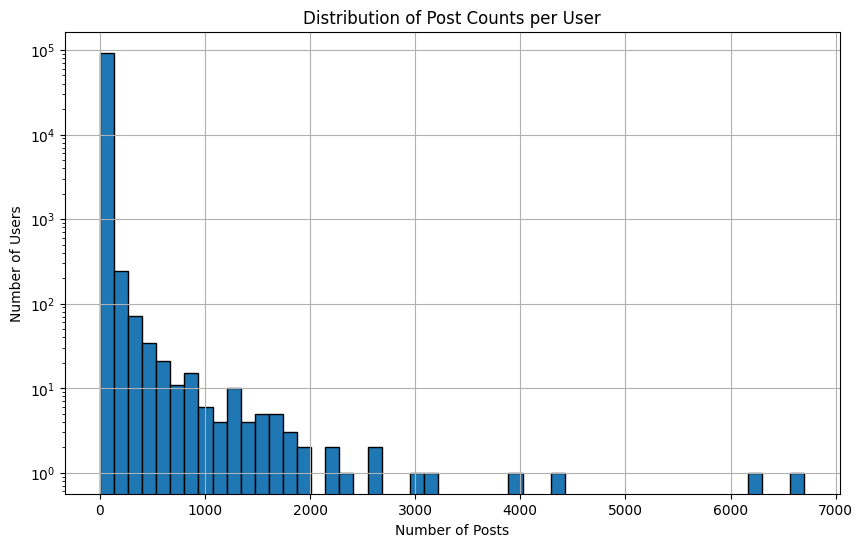

In [10]:
# Count the number of posts per user (excluding missing user IDs)
user_post_counts = df['OwnerUserId'].dropna().value_counts()

# Display descriptive statistics
print(user_post_counts.describe())

# Plot the post counts for the top 100 users only (or set a threshold as needed)
plt.figure(figsize=(10, 6))
plt.hist(user_post_counts, bins=50, edgecolor='black')
plt.title("Distribution of Post Counts per User")
plt.xlabel("Number of Posts")
plt.ylabel("Number of Users")
plt.yscale('log')  # Apply log scale to the y-axis to better visualize long-tail distribution
plt.grid(True)
plt.show()

In [11]:
# Count the number of posts per user
user_post_counts = df['OwnerUserId'].value_counts()

# Find the user with the most posts and their post count
top_user_id = user_post_counts.idxmax()
top_post_count = user_post_counts.max()

print(f"User ID with most posts: {top_user_id}, Number of posts: {top_post_count}")

User ID with most posts: 1492.0, Number of posts: 6703


In [12]:
mask = df['ViewCount'].isna()
subset = df[mask]

result = subset[['AnswerCount']].isna().all(axis=1).all()
print("When ViewCount is NaN, then AnswerCount is NaN:", result)

When ViewCount is NaN, then AnswerCount is NaN: True


In [13]:
mask = (df['CommentCount'] != 0) & (df['ViewCount'].isna())
count = df[mask].shape[0]
print("CommentCount is not 0 but Viewcount is NaN:", count)

CommentCount is not 0 but Viewcount is NaN: 0


In [14]:
df

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,...,Tags,AnswerCount,CommentCount,ContentLicense,ParentId,OwnerDisplayName,ClosedDate,LastEditorDisplayName,CommunityOwnedDate,FavoriteCount
0,1,1,5.0,2010-11-02 18:59:01.140,87,20982.0,I often hear about subatomic particles having ...,7.0,520.0,2012-08-19 23:00:18.417,...,|quantum-mechanics|particle-physics|angular-mo...,6.0,3,CC BY-SA 2.5,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,5704.0,2010-11-02 19:09:48.680,31,3946.0,How would you explain string theory to non-phy...,23.0,58382.0,2020-06-14 12:52:57.027,...,|string-theory|education|,4.0,4,CC BY-SA 4.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,180.0,2010-11-02 19:11:05.857,46,3308.0,This is a question that has been posted at man...,40.0,2451.0,2013-01-28 22:30:52.200,...,|particle-physics|group-theory|representation-...,3.0,2,CC BY-SA 3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2,0.0,2010-11-02 19:12:26.543,28,0.0,Imagine going to the rest frame of a massive p...,20.0,NaN,NaT,...,NaN,0.0,2,CC BY-SA 2.5,1.0,NaN,NaN,NaN,NaN,NaN
4,5,2,0.0,2010-11-02 19:15:20.813,52,0.0,Spin is a technical term specifically referrin...,13.0,75633.0,2017-12-13 08:24:54.477,...,NaN,0.0,0,CC BY-SA 3.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577296,808517,2,0.0,2024-03-31 22:43:15.067,1,0.0,Is the first trace in the question title a tra...,352117.0,352117.0,2024-04-01 15:39:37.470,...,NaN,0.0,0,CC BY-SA 4.0,799715.0,NaN,NaN,NaN,NaN,NaN
577297,808518,1,0.0,2024-03-31 22:49:37.613,1,32.0,Suppose we have a theory that is super-renorma...,288281.0,2451.0,2024-04-01 01:01:53.040,...,|quantum-field-theory|renormalization|feynman-...,0.0,0,CC BY-SA 4.0,NaN,NaN,NaN,NaN,NaN,NaN
577298,808519,1,0.0,2024-03-31 22:59:29.267,0,32.0,What is the speed of light in a vacuum when th...,198517.0,2451.0,2024-04-01 00:57:51.470,...,|electromagnetic-radiation|visible-light|photo...,0.0,2,CC BY-SA 4.0,NaN,NaN,2024-04-01T00:59:26.323,NaN,NaN,NaN
577299,808520,1,808552.0,2024-03-31 23:05:36.567,1,66.0,For simplicity I will be considering $\phi^4$ ...,288281.0,2451.0,2024-04-01 01:26:51.400,...,|quantum-field-theory|renormalization|feynman-...,1.0,4,CC BY-SA 4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
print(df['AnswerCount'].describe())

# Filter out rows where CommentCount is 0
AnswerCount = df[df['AnswerCount'] != 0]

# Define custom bins and labels
bins = [0, 5, 10, 20, float('inf')]
labels = ['1-5', '6-10', '11-20', '21+']

# Categorize data into bins
AnswerCount['AnswerCountGroup'] = pd.cut(AnswerCount['AnswerCount'], bins=bins, labels=labels)

# Calculate the count and percentage of each group
percentages = AnswerCount['AnswerCountGroup'].value_counts(normalize=True).sort_index() * 100

# Display the results
print(percentages.round(2))

count    576958.000000
mean          0.592083
std           1.108555
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          49.000000
Name: AnswerCount, dtype: float64
AnswerCountGroup
1-5      98.20
6-10      1.65
11-20     0.14
21+       0.01
Name: proportion, dtype: float64


C:\Users\jiali\AppData\Local\Temp\ipykernel_14388\3951270745.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AnswerCount['AnswerCountGroup'] = pd.cut(AnswerCount['AnswerCount'], bins=bins, labels=labels)


In [16]:
print(df['CommentCount'].describe())

# Filter out rows where CommentCount is 0
CommentCount = df[df['CommentCount'] != 0]

# Define custom bins and labels
bins = [0, 5, 10, 20, float('inf')]
labels = ['1-5', '6-10', '11-20', '21+']

# Categorize data into bins
CommentCount['CommentCountGroup'] = pd.cut(CommentCount['CommentCount'], bins=bins, labels=labels)

# Calculate the count and percentage of each group
percentages = CommentCount['CommentCountGroup'].value_counts(normalize=True).sort_index() * 100

# Display the results
print(percentages.round(2))

count    576958.000000
mean          1.968228
std           2.829263
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max         144.000000
Name: CommentCount, dtype: float64
CommentCountGroup
1-5      82.46
6-10     14.17
11-20     3.24
21+       0.13
Name: proportion, dtype: float64


C:\Users\jiali\AppData\Local\Temp\ipykernel_14388\2906526130.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CommentCount['CommentCountGroup'] = pd.cut(CommentCount['CommentCount'], bins=bins, labels=labels)



Percentage (%) of MaintainDurationDays


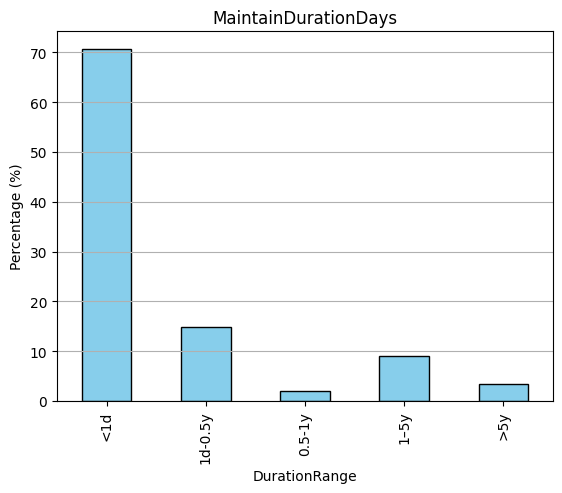

DurationRange
<1d        70.69
1d-0.5y    14.76
0.5-1y      2.08
1–5y        9.02
>5y         3.45
Name: count, dtype: float64


In [17]:
# Select rows where LastEditDate is not null
LastEditDate = df[df['LastEditDate'].notna()].copy()

# Calculate maintenance duration (resulting in Timedelta type)
LastEditDate['MaintainDuration'] = LastEditDate['LastEditDate'] - LastEditDate['CreationDate']
LastEditDate['MaintainDurationDays'] = LastEditDate['MaintainDuration'].dt.total_seconds() / (24 * 3600)

# Define bins (unit: days)
bins = [0, 1, 180, 365, 5*365, float('inf')]
labels = ['<1d', '1d-0.5y', '0.5-1y', '1–5y', '>5y']

# Create a new column for duration range using pd.cut
LastEditDate['DurationRange'] = pd.cut(LastEditDate['MaintainDurationDays'], bins=bins, labels=labels, right=False)

# Calculate frequency and percentage
distribution = LastEditDate['DurationRange'].value_counts().sort_index()
percentage = (distribution / distribution.sum() * 100).round(2)

print("\nPercentage (%) of MaintainDurationDays")

percentage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('MaintainDurationDays')
plt.xlabel('DurationRange')
plt.ylabel('Percentage (%)')
plt.grid(axis='y')
plt.show()
print(percentage)


Percentage (%): of ActiveDurationDays
ActiveDurationRange
<1d        78.39
1d-0.5y    11.32
0.5-1y      1.46
1–5y        6.11
>5y         2.73
Name: count, dtype: float64


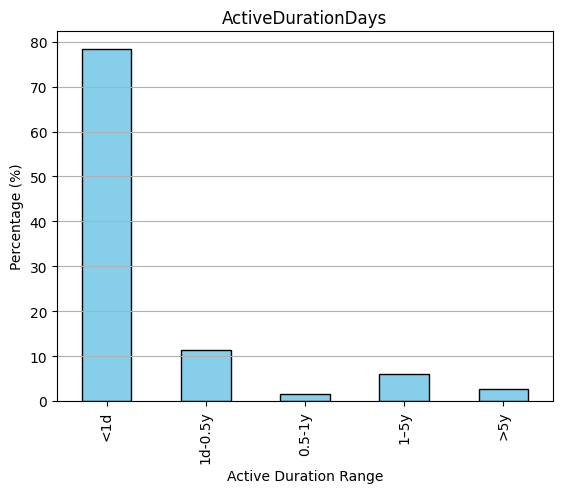

In [18]:
# Select rows where LastActivityDate is not null
LastActivityDate = df[df['LastActivityDate'].notna()].copy()

# Calculate active duration (in days)
LastActivityDate['ActiveDuration'] = LastActivityDate['LastActivityDate'] - LastActivityDate['CreationDate']
LastActivityDate['ActiveDurationDays'] = LastActivityDate['ActiveDuration'].dt.total_seconds() / (24 * 3600)

# Define bins (unit: days)
bins = [0, 1, 180, 365, 5*365, float('inf')]
labels = ['<1d', '1d-0.5y', '0.5-1y', '1–5y', '>5y']

# Group into duration ranges
LastActivityDate['ActiveDurationRange'] = pd.cut(LastActivityDate['ActiveDurationDays'], bins=bins, labels=labels, right=False)

# Calculate frequency and percentage
distribution = LastActivityDate['ActiveDurationRange'].value_counts().sort_index()
percentage = (distribution / distribution.sum() * 100).round(2)

# Print the results
print("\nPercentage (%): of ActiveDurationDays")
print(percentage)

percentage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('ActiveDurationDays')
plt.xlabel('Active Duration Range')
plt.ylabel('Percentage (%)')
plt.grid(axis='y')
plt.show()

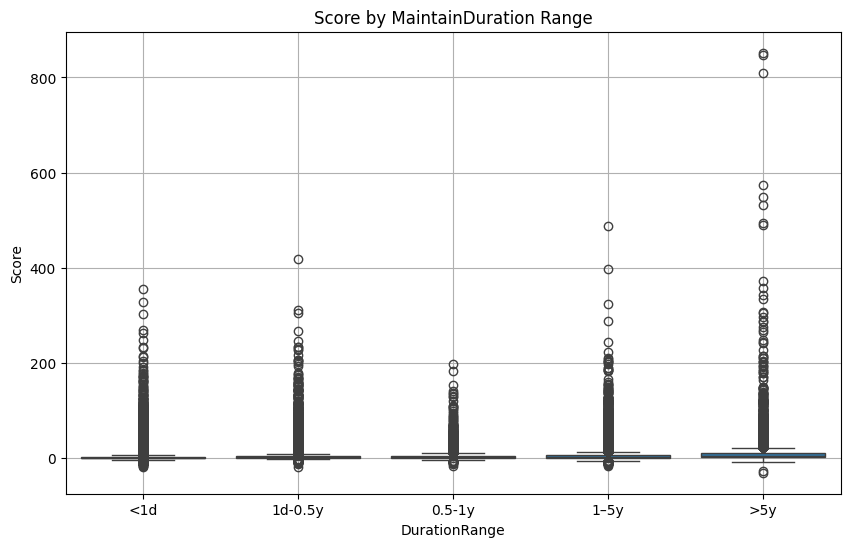

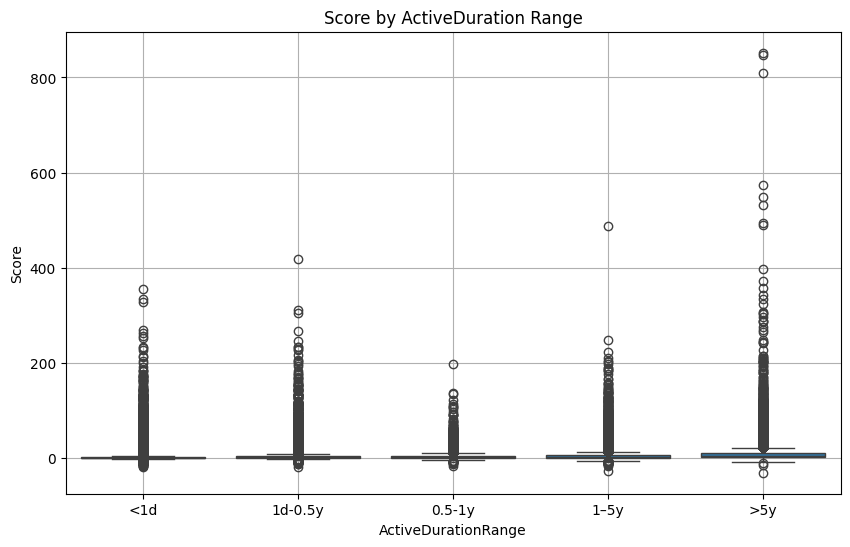

In [19]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='DurationRange', y='Score', data=LastEditDate)
plt.title('Score by MaintainDuration Range')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='ActiveDurationRange', y='Score', data=LastActivityDate)
plt.title('Score by ActiveDuration Range')
plt.grid(True)
plt.show()

In [20]:
corr = df[['Score', 'ViewCount']].corr(method='pearson')
print("Score 与 ViewCount 的相关系数：")
print(corr)

Score 与 ViewCount 的相关系数：
              Score  ViewCount
Score      1.000000   0.221884
ViewCount  0.221884   1.000000


                     mean  median  count
ViewCountRange                          
0–100            0.572889     0.0  59069
101–500          1.370783     1.0  91037
501–1k           2.446403     2.0  30188
1k–5k            4.389203     2.0  40845
5k–10k          10.125232     5.0   6995
10k–50k         16.285873     7.0   5401
>50k            36.390600    16.0    617


C:\Users\jiali\AppData\Local\Temp\ipykernel_14388\1175193083.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('ViewCountRange')['Score'].agg(['mean', 'median', 'count'])


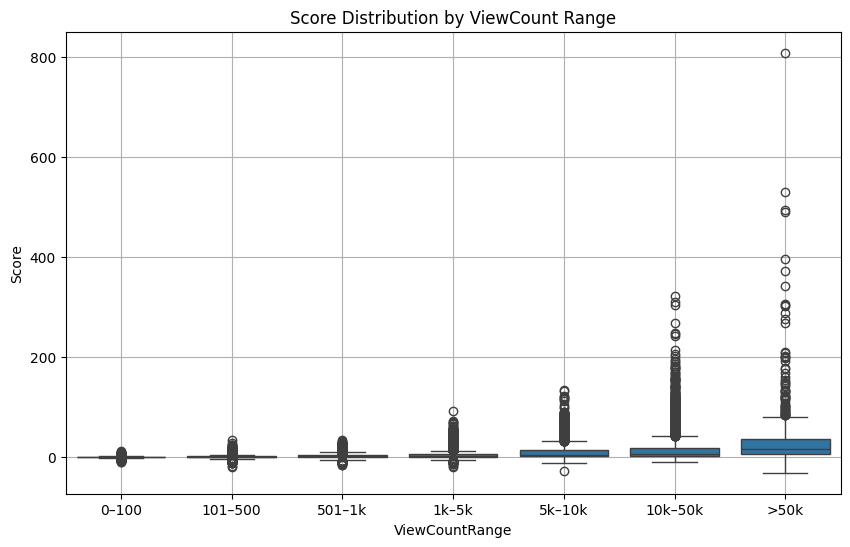

In [21]:

bins = [0, 100, 500, 1000, 5000, 10000, 50000, float('inf')]
labels = ['0–100', '101–500', '501–1k', '1k–5k', '5k–10k', '10k–50k', '>50k']

df['ViewCountRange'] = pd.cut(df['ViewCount'], bins=bins, labels=labels)

# 分组统计 Score 的均值、中位数
grouped = df.groupby('ViewCountRange')['Score'].agg(['mean', 'median', 'count'])
print(grouped)
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='ViewCountRange', y='Score', data=df)
plt.title('Score Distribution by ViewCount Range')
plt.grid(True)
plt.show()

In [22]:
df['YearMonth'] = df['CreationDate'].dt.to_period('M')

# Monthly post counts
monthly_counts = df['YearMonth'].value_counts().sort_index()
monthly_counts.index = monthly_counts.index.to_timestamp()

# Create DataFrame with yearly info
monthly_counts_df = monthly_counts.reset_index()
monthly_counts_df.columns = ['YearMonth', 'PostCount']
monthly_counts_df['Year'] = monthly_counts_df['YearMonth'].dt.year

# Get max and min month per year
# Sort to ensure tie-breaking by earliest month
monthly_counts_df = monthly_counts_df.sort_values(['Year', 'PostCount', 'YearMonth'])

# get the maxmonths
idx_max = monthly_counts_df.groupby('Year')['PostCount'].idxmax()
max_months = monthly_counts_df.loc[idx_max].drop_duplicates(subset='Year')

# get the minmonths
idx_min = monthly_counts_df.groupby('Year')['PostCount'].idxmin()
min_months = monthly_counts_df.loc[idx_min].drop_duplicates(subset='Year')

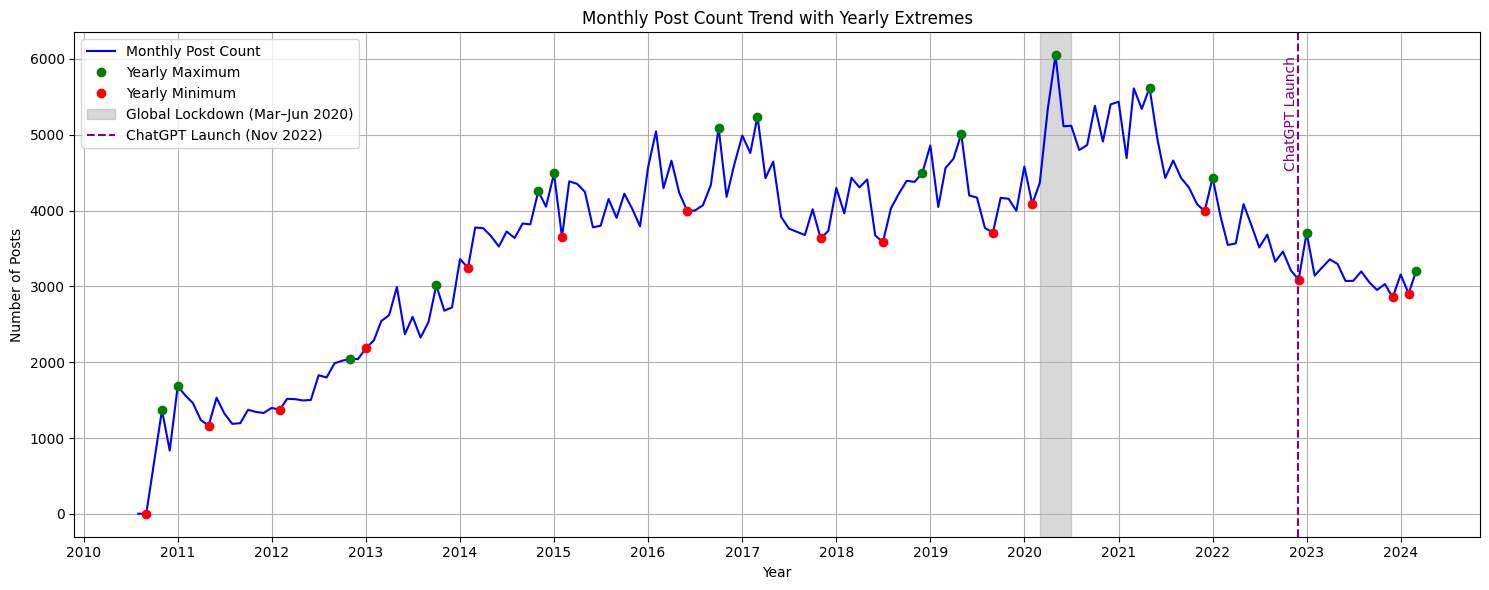

In [23]:
import matplotlib.dates as mdates
from datetime import datetime

plt.figure(figsize=(15, 6))
plt.plot(monthly_counts.index, monthly_counts.values, label="Monthly Post Count", color='blue', linewidth=1.5)

# Mark yearly maxima and minima
plt.plot(max_months['YearMonth'], max_months['PostCount'], 'o', color='green', label='Yearly Maximum')
plt.plot(min_months['YearMonth'], min_months['PostCount'], 'o', color='red', label='Yearly Minimum')

# Highlight lockdown period (March 1 to June 30, 2020)
lockdown_start = datetime(2020, 3, 1)
lockdown_end = datetime(2020, 6, 30)
plt.axvspan(lockdown_start, lockdown_end, color='gray', alpha=0.3, label='Global Lockdown (Mar–Jun 2020)')

chatgpt_launch = datetime(2022, 11, 30)
plt.axvline(chatgpt_launch, color='purple', linestyle='--', linewidth=1.5, label='ChatGPT Launch (Nov 2022)')
plt.text(chatgpt_launch, plt.ylim()[1]*0.95, 'ChatGPT Launch', color='purple', rotation=90, va='top', ha='right')

# Formatting
plt.title("Monthly Post Count Trend with Yearly Extremes")
plt.xlabel("Year")
plt.ylabel("Number of Posts")
plt.grid(True)
plt.legend()

# ---- Custom X-axis: yearly ticks only ----
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

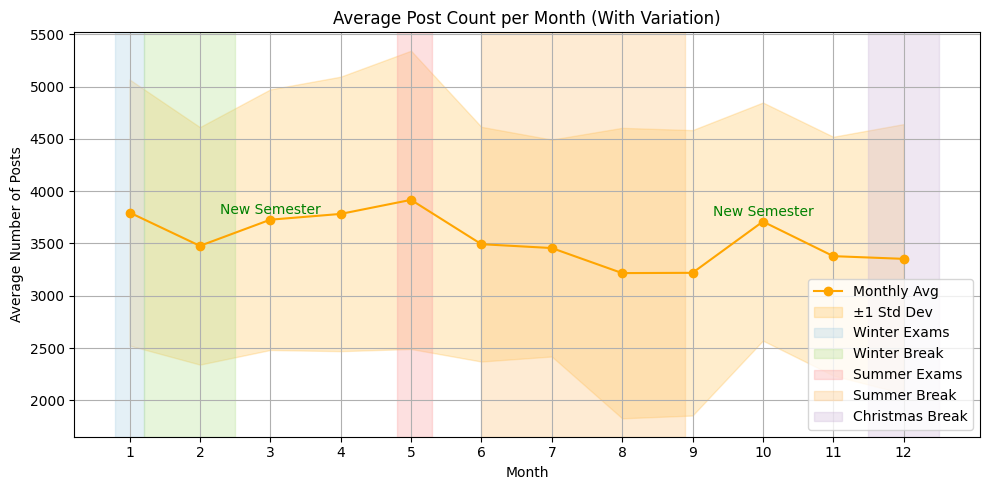

In [24]:
monthly_counts_df = monthly_counts.reset_index()
monthly_counts_df.columns = ['YearMonth', 'PostCount']
monthly_counts_df['Month'] = monthly_counts_df['YearMonth'].dt.month

monthly_avg = monthly_counts_df.groupby('Month')['PostCount'].mean()
# 计算每个月的平均值和标准差
# 计算每月平均和标准差
monthly_stats = monthly_counts_df.groupby('Month')['PostCount'].agg(['mean', 'std'])

# 创建图像
plt.figure(figsize=(10, 5))

# 平均线
plt.plot(monthly_stats.index, monthly_stats['mean'], marker='o', color='orange', label='Monthly Avg')

# 标准差阴影带
plt.fill_between(
    monthly_stats.index,
    monthly_stats['mean'] - monthly_stats['std'],
    monthly_stats['mean'] + monthly_stats['std'],
    color='orange',
    alpha=0.2,
    label='±1 Std Dev'
)

# 添加标题和标签
plt.title("Average Post Count per Month (With Variation)")
plt.xlabel("Month")
plt.ylabel("Average Number of Posts")
plt.xticks(range(1, 13))
plt.grid(True)

# -------- 添加假期和考试区间 --------
plt.axvspan(0.8, 1.2, color='#a6cee3', alpha=0.3, label="Winter Exams")
plt.axvspan(1.2, 2.5, color='#b2df8a', alpha=0.3, label="Winter Break")
plt.axvspan(4.8, 5.3, color='#fb9a99', alpha=0.3, label="Summer Exams")
plt.axvspan(6.0, 8.9, color='#fdbf6f', alpha=0.3, label="Summer Break")
plt.axvspan(11.5, 12.5, color='#cab2d6', alpha=0.3, label="Christmas Break")

# -------- 添加“新学期”标签 --------
plt.text(3,  monthly_stats.loc[3, 'mean'] + 50, "New Semester", ha='center', color='green')
plt.text(10, monthly_stats.loc[10, 'mean'] + 50, "New Semester", ha='center', color='green')

# 去除重复图例项
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.tight_layout()
plt.show()


C:\Users\jiali\AppData\Local\Temp\ipykernel_14388\3999457593.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: (g['AnswerCount'] == 0).mean())


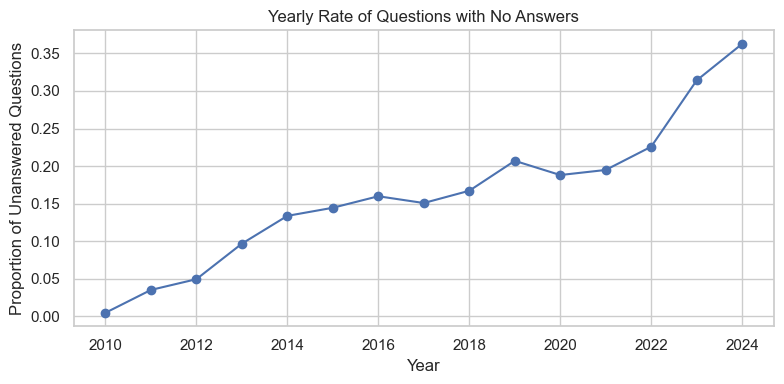

In [39]:
# 确保 CreationDate 是 datetime 类型
df['CreationDate'] = pd.to_datetime(df['CreationDate'])
df['Year'] = df['CreationDate'].dt.year

# 仅保留问题贴（PostTypeId == 1）
questions = df[df['PostTypeId'] == 1].copy()

# 每年无人回答的问题占比
no_answer_stats = (
    questions.groupby('Year')
    .apply(lambda g: (g['AnswerCount'] == 0).mean())
    .reset_index(name='NoAnswerRate')
)

# 可视化
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(no_answer_stats['Year'], no_answer_stats['NoAnswerRate'], marker='o')
plt.title("Yearly Rate of Questions with No Answers")
plt.ylabel("Proportion of Unanswered Questions")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()


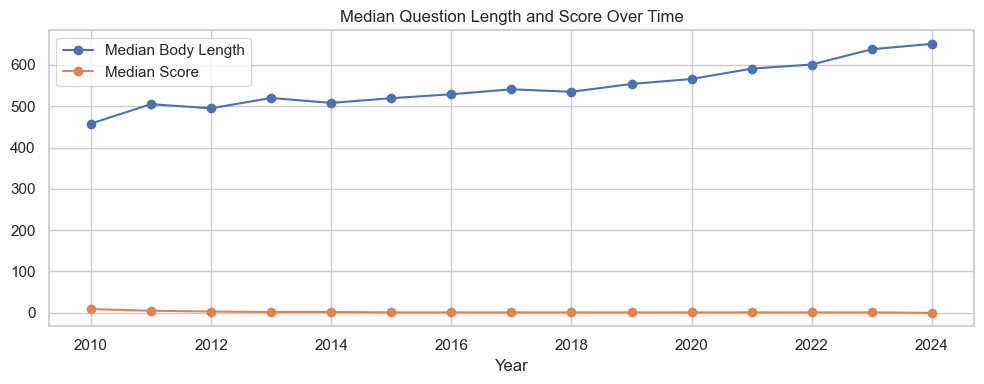

In [40]:
# 中位数变化：正文长度和得分
body_score_stats = (
    questions.groupby('Year')
    .agg(MedianLength=('BodyLength_CleanedChar', 'median'),
         MedianScore=('Score', 'median'))
    .reset_index()
)

# 可视化
plt.figure(figsize=(10, 4))
plt.plot(body_score_stats['Year'], body_score_stats['MedianLength'], label='Median Body Length', marker='o')
plt.plot(body_score_stats['Year'], body_score_stats['MedianScore'], label='Median Score', marker='o')
plt.title("Median Question Length and Score Over Time")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


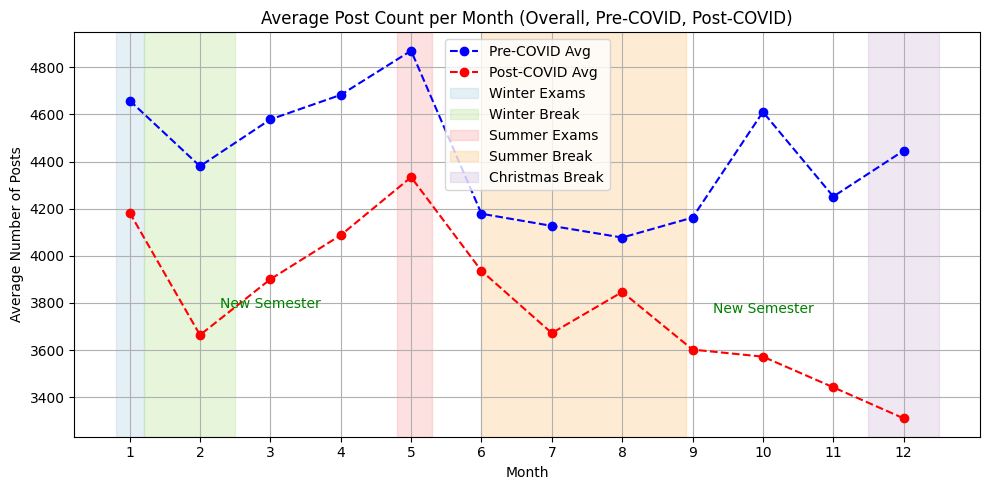

In [25]:
# Add 'Year' column extracted from 'YearMonth'
monthly_counts_df['Year'] = monthly_counts_df['YearMonth'].dt.year

# Define pre-COVID (2016–2020) and post-COVID (2021 onwards) periods
pre_covid_df = monthly_counts_df[(monthly_counts_df['Year'] >= 2016) & (monthly_counts_df['Year'] <= 2020)]
post_covid_df = monthly_counts_df[monthly_counts_df['Year'] >= 2021]

# Compute average post count per month for each period
pre_covid_avg = pre_covid_df.groupby('Month')['PostCount'].mean()
post_covid_avg = post_covid_df.groupby('Month')['PostCount'].mean()

# Compute overall monthly average and standard deviation (for shading)
monthly_stats = monthly_counts_df.groupby('Month')['PostCount'].agg(['mean', 'std'])

# Create plot
plt.figure(figsize=(10, 5))

# Plot pre- and post-COVID monthly averages
plt.plot(pre_covid_avg.index, pre_covid_avg.values, marker='o', color='blue', linestyle='--', label='Pre-COVID Avg')
plt.plot(post_covid_avg.index, post_covid_avg.values, marker='o', color='red', linestyle='--', label='Post-COVID Avg')

# Set title and axes labels
plt.title("Average Post Count per Month (Overall, Pre-COVID, Post-COVID)")
plt.xlabel("Month")
plt.ylabel("Average Number of Posts")
plt.xticks(range(1, 13))
plt.grid(True)

# Highlight holiday and exam periods with shaded blocks
plt.axvspan(0.8, 1.2, color='#a6cee3', alpha=0.3, label="Winter Exams")
plt.axvspan(1.2, 2.5, color='#b2df8a', alpha=0.3, label="Winter Break")
plt.axvspan(4.8, 5.3, color='#fb9a99', alpha=0.3, label="Summer Exams")
plt.axvspan(6.0, 8.9, color='#fdbf6f', alpha=0.3, label="Summer Break")
plt.axvspan(11.5, 12.5, color='#cab2d6', alpha=0.3, label="Christmas Break")

# Add "New Semester" labels in March and October
plt.text(3,  monthly_stats.loc[3, 'mean'] + 50, "New Semester", ha='center', color='green')
plt.text(10, monthly_stats.loc[10, 'mean'] + 50, "New Semester", ha='center', color='green')

# Remove duplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [26]:
# Ensure the existence of YearMonth and PostCount fields
monthly_counts_df = monthly_counts.reset_index()
monthly_counts_df.columns = ['YearMonth', 'PostCount']
monthly_counts_df['Year'] = monthly_counts_df['YearMonth'].dt.year
monthly_counts_df['Month'] = monthly_counts_df['YearMonth'].dt.month

# Add previous month's post count (sorted by year to ensure alignment)
monthly_counts_df = monthly_counts_df.sort_values(['Year', 'Month'])
monthly_counts_df['PrevPostCount'] = monthly_counts_df.groupby('Year')['PostCount'].shift(1)

# Calculate the difference
monthly_counts_df['MonthDiff'] = monthly_counts_df['PostCount'] - monthly_counts_df['PrevPostCount']

# Remove the first month (no previous month to compare)
monthly_diff_by_month = monthly_counts_df.dropna(subset=['MonthDiff'])

# Group by current month and calculate average difference 
# (e.g., for March, it's the average of “March - February”)
avg_diff_per_month = monthly_diff_by_month.groupby('Month')['MonthDiff'].mean()

In [27]:
monthly_counts_df = monthly_counts.reset_index()
monthly_counts_df.columns = ['YearMonth', 'PostCount']
monthly_counts_df['Month'] = monthly_counts_df['YearMonth'].dt.month

monthly_counts_df = monthly_counts_df.sort_values('YearMonth')
monthly_counts_df['MonthDiff'] = monthly_counts_df['PostCount'].diff()

monthly_diff_by_month = monthly_counts_df.dropna(subset=['MonthDiff'])

avg_diff_per_month = monthly_diff_by_month.groupby('Month')['MonthDiff'].mean()

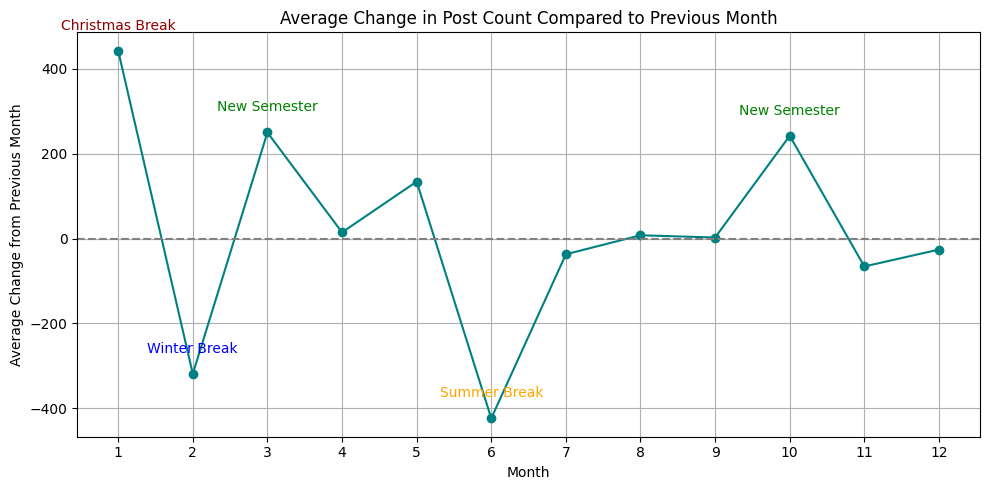

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(avg_diff_per_month.index, avg_diff_per_month.values, marker='o', linestyle='-', color='teal')
plt.axhline(0, color='gray', linestyle='--')

plt.title("Average Change in Post Count Compared to Previous Month")
plt.xlabel("Month")
plt.ylabel("Average Change from Previous Month")
plt.xticks(range(1, 13))
plt.grid(True)

plt.text(1, avg_diff_per_month.loc[1] + 50, "Christmas Break", ha='center', color='darkred')
plt.text(2, avg_diff_per_month.loc[2] + 50, "Winter Break", ha='center', color='blue')
plt.text(6, avg_diff_per_month.loc[6] + 50, "Summer Break", ha='center', color='orange')
plt.text(3, avg_diff_per_month.loc[3] + 50, "New Semester", ha='center', color='green')
plt.text(10, avg_diff_per_month.loc[10] + 50, "New Semester", ha='center', color='green')

plt.tight_layout()
plt.show()

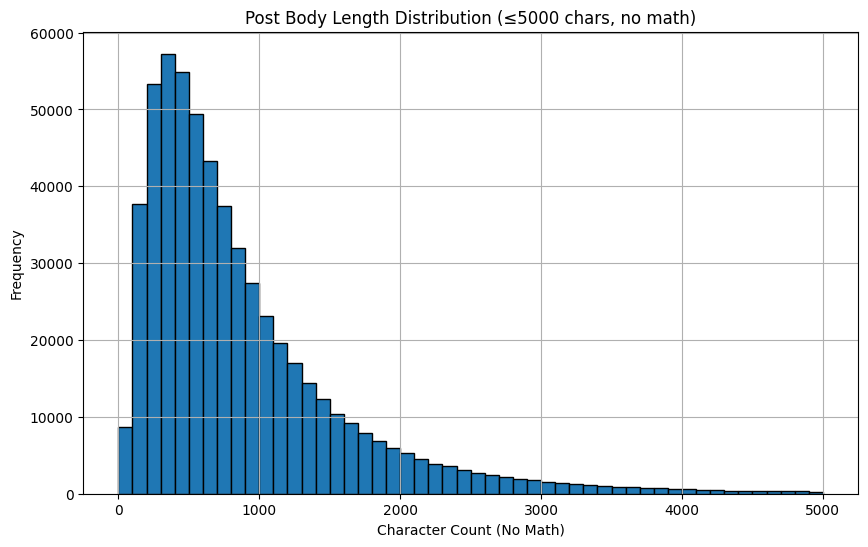

In [29]:
df['CleanBodyNoMath'] = df['Body'].apply(remove_math_expressions)

df['BodyLength_CleanedChar'] = df['CleanBodyNoMath'].str.len()

filtered = df[df['BodyLength_CleanedChar'] <= 5000]

plt.figure(figsize=(10, 6))
plt.hist(filtered['BodyLength_CleanedChar'], bins=50, edgecolor='black')
plt.title('Post Body Length Distribution (≤5000 chars, no math)')
plt.xlabel('Character Count (No Math)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [31]:
# Define length bins
bins = [0, 200, 500, 1000, 2000, 5000]
labels = ['0–200', '201–500', '501–1000', '1001–2000', '2001–5000']

filtered['LengthRange'] = pd.cut(filtered['BodyLength_CleanedChar'], bins=bins, labels=labels)

# Group by length range and calculate the mean and median of Score
score_stats = filtered.groupby('LengthRange')['Score'].agg(['mean', 'median', 'count'])
print(score_stats)

                 mean  median   count
LengthRange                          
0–200        1.754724     1.0   46413
201–500      2.091954     1.0  165387
501–1000     2.516494     1.0  189497
1001–2000    3.234246     2.0  126700
2001–5000    4.754324     2.0   45153


C:\Users\jiali\AppData\Local\Temp\ipykernel_14388\2908798940.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['LengthRange'] = pd.cut(filtered['BodyLength_CleanedChar'], bins=bins, labels=labels)
C:\Users\jiali\AppData\Local\Temp\ipykernel_14388\2908798940.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  score_stats = filtered.groupby('LengthRange')['Score'].agg(['mean', 'median', 'count'])


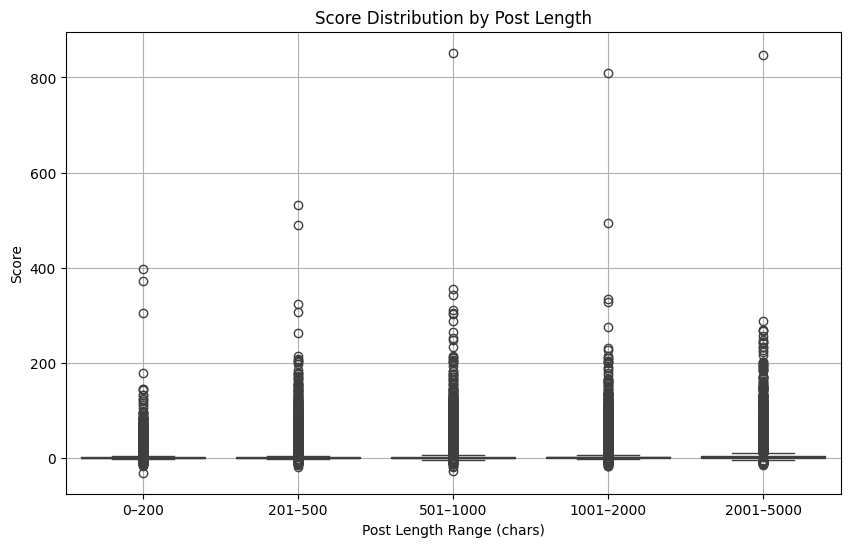

In [32]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='LengthRange', y='Score', data=filtered)
plt.title('Score Distribution by Post Length')
plt.xlabel('Post Length Range (chars)')
plt.ylabel('Score')
plt.grid(True)
plt.show()

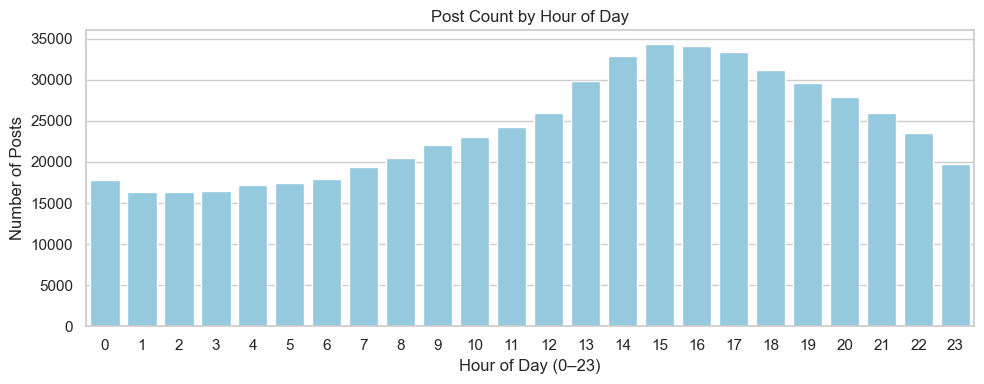

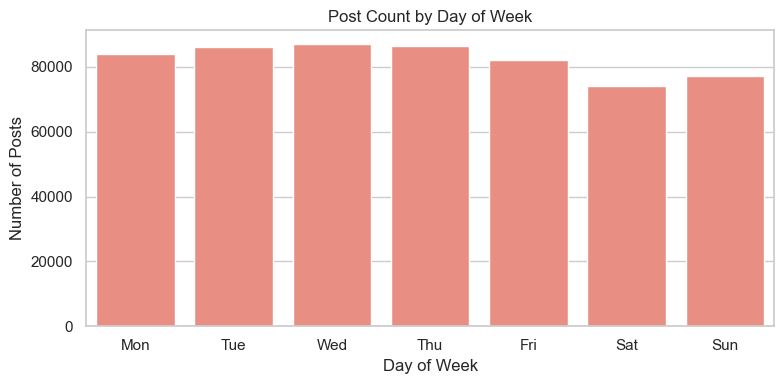

In [ ]:
# Extract hour and weekday from post creation time
df['PostHour'] = df['CreationDate'].dt.hour
df['PostWeekday'] = df['CreationDate'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Map weekday number to weekday name
weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['PostWeekdayName'] = df['PostWeekday'].map(weekday_map)

# Set seaborn visual style
sns.set(style='whitegrid')

# ------------ Plot 1: Post count by hour of day ------------
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='PostHour', color='skyblue')
plt.title("Post Count by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Posts")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# ------------ Plot 2: Post count by day of week ------------
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='PostWeekdayName', order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], color='salmon')
plt.title("Post Count by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()


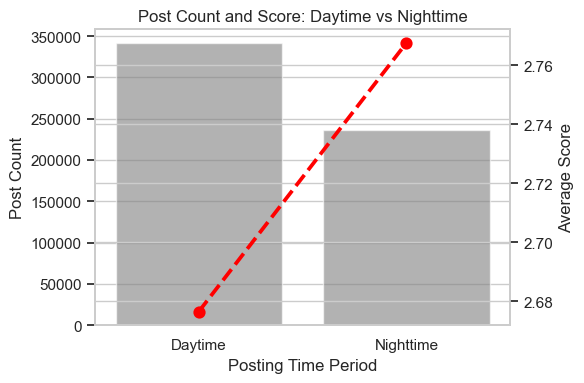

In [ ]:
# Extract the hour from the post creation timestamp
df['PostHour'] = df['CreationDate'].dt.hour

# Define time-of-day periods: Daytime (08:00–19:00), Nighttime (20:00–07:00)
df['TimePeriod'] = df['PostHour'].apply(lambda h: 'Daytime' if 8 <= h <= 19 else 'Nighttime')

# Aggregate: calculate average score and post count for each time period
summary = df.groupby('TimePeriod')['Score'].agg(['mean', 'count']).reset_index()

# Create a dual-axis chart: bar for post count, line for average score
fig, ax1 = plt.subplots(figsize=(6, 4))

# Bar plot: number of posts per time period
sns.barplot(data=summary, x='TimePeriod', y='count', ax=ax1, alpha=0.6, color='gray')
ax1.set_ylabel("Post Count")
ax1.set_xlabel("Posting Time Period")

# Line plot: average score per time period
ax2 = ax1.twinx()
sns.pointplot(data=summary, x='TimePeriod', y='mean', ax=ax2, color='red', markers='o', linestyles='--')
ax2.set_ylabel("Average Score")

plt.title("Post Count and Score: Daytime vs Nighttime")
plt.tight_layout()
plt.show()


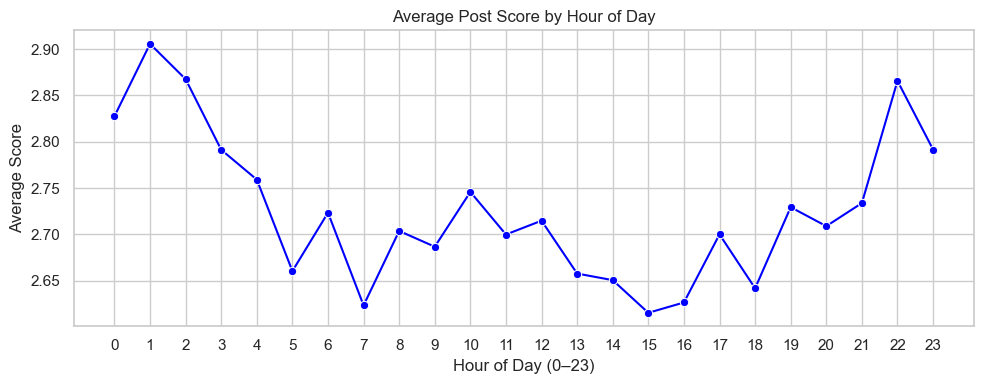

In [ ]:
# Extract the hour from the post creation timestamp
df['PostHour'] = df['CreationDate'].dt.hour

# Group by hour and calculate the average score for each hour
hourly_score = df.groupby('PostHour')['Score'].mean().reset_index()

# Visualize the average score by hour of day
plt.figure(figsize=(10, 4))
sns.lineplot(data=hourly_score, x='PostHour', y='Score', marker='o', color='blue')
plt.xticks(range(0, 24))
plt.title("Average Post Score by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Average Score")
plt.grid(True)
plt.tight_layout()
plt.show()


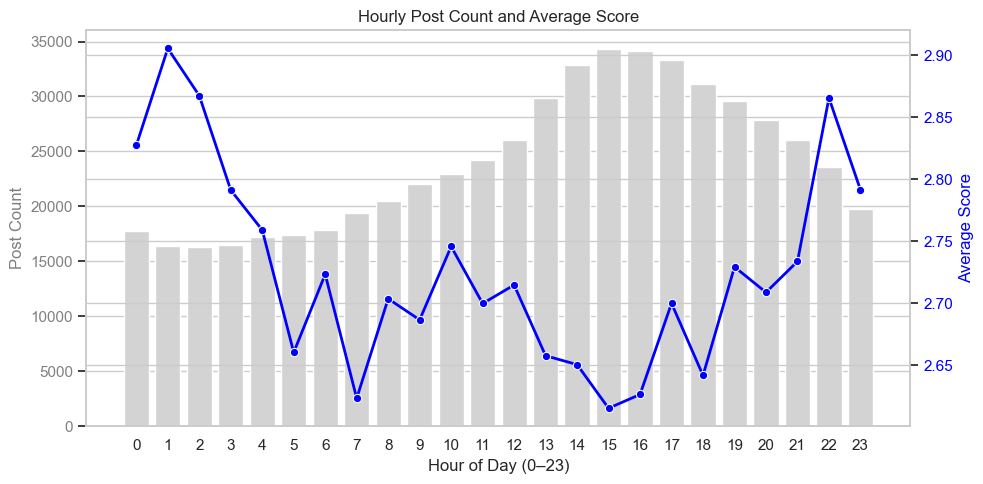

In [ ]:
# Extract the hour from the post creation timestamp
df['PostHour'] = df['CreationDate'].dt.hour

# Group by hour to compute average score and post count
hourly_stats = df.groupby('PostHour')['Score'].agg(['mean', 'count']).reset_index()

# Initialize figure and primary axis (for post count)
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot on primary y-axis: post count per hour
sns.barplot(x='PostHour', y='count', data=hourly_stats, ax=ax1, color='lightgray')
ax1.set_ylabel('Post Count', color='gray')
ax1.set_xlabel('Hour of Day (0–23)')
ax1.tick_params(axis='y', labelcolor='gray')

# Line plot on secondary y-axis: average score per hour
ax2 = ax1.twinx()
sns.lineplot(x='PostHour', y='mean', data=hourly_stats, ax=ax2, marker='o', color='blue', linewidth=2)
ax2.set_ylabel('Average Score', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and formatting
plt.title("Hourly Post Count and Average Score")
ax1.set_xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


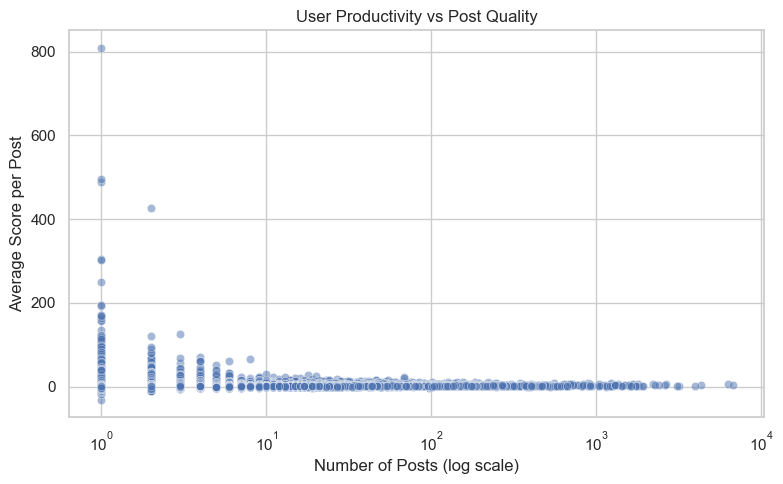

In [ ]:
# Remove anonymous posts (i.e., those without OwnerUserId)
df_user = df[df['OwnerUserId'].notnull()]

# Aggregate by user: calculate number of posts and average score
user_stats = df_user.groupby('OwnerUserId')['Score'].agg(['count', 'mean']).reset_index()
user_stats.columns = ['OwnerUserId', 'PostCount', 'AvgScore']

# Scatter plot: number of posts vs average score per user
plt.figure(figsize=(8, 5))
sns.scatterplot(data=user_stats, x='PostCount', y='AvgScore', alpha=0.5)
plt.xscale('log')  # Log scale for post count to handle heavy-tailed distribution
plt.xlabel("Number of Posts (log scale)")
plt.ylabel("Average Score per Post")
plt.title("User Productivity vs Post Quality")
plt.grid(True)
plt.tight_layout()
plt.show()


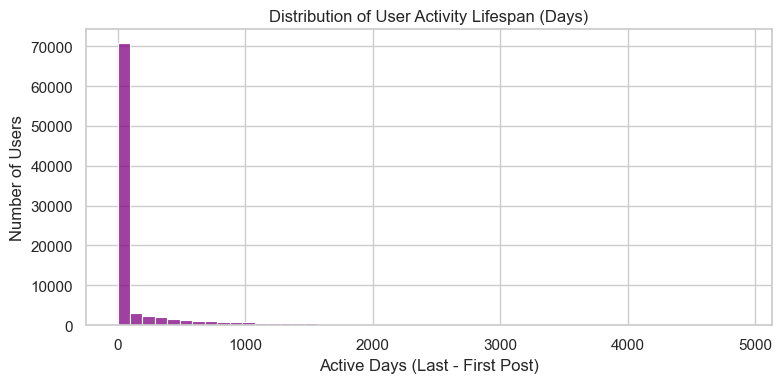

In [ ]:
# Calculate user activity lifespan: days between first and last post
user_lifespan = df_user.groupby('OwnerUserId')['CreationDate'].agg(['min', 'max']).reset_index()
user_lifespan['ActiveDays'] = (user_lifespan['max'] - user_lifespan['min']).dt.days

# Visualize the distribution of user activity lifespans
plt.figure(figsize=(8, 4))
sns.histplot(user_lifespan['ActiveDays'], bins=50, kde=False, color='purple')
plt.title("Distribution of User Activity Lifespan (Days)")
plt.xlabel("Active Days (Last Post - First Post)")
plt.ylabel("Number of Users")
plt.grid(True)
plt.tight_layout()
plt.show()


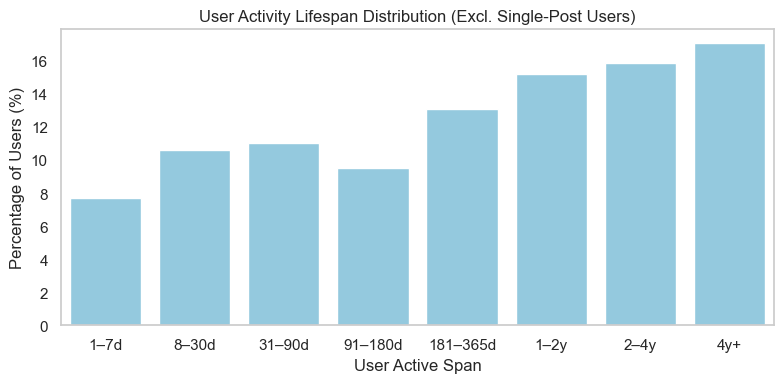

In [ ]:
# Filter out users who posted only once (i.e., ActiveDays = 0)
active_users = user_lifespan[user_lifespan['ActiveDays'] > 0].copy()

# Define lifespan bins in days
bins = [1, 7, 30, 90, 180, 365, 730, 1460, float('inf')]
labels = [
    '1–7d', '8–30d', '31–90d', '91–180d', '181–365d',
    '1–2y', '2–4y', '4y+'
]

# Categorize each user into a lifespan group
active_users['LifespanGroup'] = pd.cut(
    active_users['ActiveDays'],
    bins=bins,
    labels=labels,
    right=True
)

# Calculate the percentage of users in each lifespan group
lifespan_dist = (
    active_users['LifespanGroup']
    .value_counts(normalize=True)
    .sort_index()
    .reset_index()
)
lifespan_dist.columns = ['ActiveSpan', 'Proportion']  # Rename columns

# Convert proportions to percentage format
lifespan_dist['Proportion'] = lifespan_dist['Proportion'].astype(float) * 100
lifespan_dist['Proportion'] = lifespan_dist['Proportion'].round(2)

# Plot lifespan distribution
plt.figure(figsize=(8, 4))
sns.barplot(data=lifespan_dist, x='ActiveSpan', y='Proportion', color='skyblue')
plt.title("User Activity Lifespan Distribution (Excl. Single-Post Users)")
plt.xlabel("User Active Span")
plt.ylabel("Percentage of Users (%)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
